In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report


# Sample dataset
data = {
'text': ['I love this movie', 'I hate this movie', 
'Best movie ever', 'Worst movie ever'],
'sentiment': ['positive', 'negative', 'positive', 'negative']
}
df = pd.DataFrame(data)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
df['text'], df['sentiment'], test_size=0.2, random_state=42)

# Create a machine learning pipeline
pipeline = Pipeline([
('vect', CountVectorizer()),
('tfidf', TfidfTransformer()),
('clf', LogisticRegression())
])

# Train the model
pipeline.fit(X_train, y_train)

# Predict on the test dataset
print(type(X_test))
predictions = pipeline.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, predictions))
print("\nClassification Report:\n", classification_report(y_test, predictions))
print(predictions)

<class 'pandas.core.series.Series'>
Accuracy: 0.0

Classification Report:
               precision    recall  f1-score   support

    negative       0.00      0.00      0.00       1.0
    positive       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0

['positive']


C:\Users\bijay\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\bijay\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\bijay\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re
import string
import spacy
import nltk
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from spacy import displacy
import plotly.express as px 
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.linear_model import LogisticRegression
from collections import Counter
import warnings
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
import scikitplot as skplt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


In [3]:
nltk.download("vader_lexicon")
warnings.filterwarnings('ignore')
data = pd.read_csv("../data/raw/sentiment_train_Final.csv")
data = data.loc[:, ~data.columns.str.match('Unnamed')]
data.head(5)

from sklearn.preprocessing import LabelEncoder
data.shape
data.describe()
le = LabelEncoder()
data['seintiment_target'] = le.fit_transform(data.Sentiment)
data.head(5)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\bijay\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,Description,Sentiment,seintiment_target
0,So there is no way for me to plug it in here i...,Unhappy,1
1,Good case,Unhappy,1
2,Great for the jawbone.,Happy,0
3,Tied to charger for conversations lasting more...,Unhappy,1
4,The mic is great.,Happy,0


In [4]:
def drop_nulls(data):
    empty_list = []
    print(data.itertuples())
    for rows in data.itertuples():
        if type(rows)==str:
            if rows.isspace():
                empty_list.append(reviews)
    print('Is there any missing value?\n')
    if len(empty_list)==0:
        print('-- 🔬There is no missing value in this dataframe🔬 --')
    else:
        print('Dataframe includes null values😡. Missing value count is :{} \n Missing value percentage is : {}'.format(len(empty_list),len(empty_list)/len(data)))
        data.drop(empty_list,inplace=True)
    return data

In [5]:
data = drop_nulls(data)

Is there any missing value?

-- 🔬There is no missing value in this dataframe🔬 --


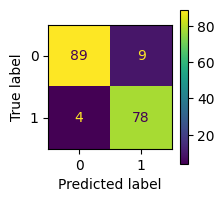

              precision    recall  f1-score   support

           0       0.96      0.91      0.93        98
           1       0.90      0.95      0.92        82

    accuracy                           0.93       180
   macro avg       0.93      0.93      0.93       180
weighted avg       0.93      0.93      0.93       180

Overall accuracy is 93% 💣

---> 0.983271375464684
Random Forest Classifier DONE!


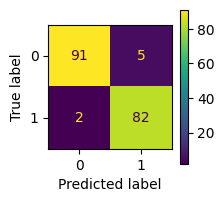

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        96
           1       0.94      0.98      0.96        84

    accuracy                           0.96       180
   macro avg       0.96      0.96      0.96       180
weighted avg       0.96      0.96      0.96       180

Overall accuracy is 96% 💣

K Nearest Neighbor Classifier DONE!


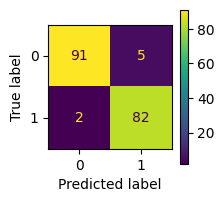

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        96
           1       0.94      0.98      0.96        84

    accuracy                           0.96       180
   macro avg       0.96      0.96      0.96       180
weighted avg       0.96      0.96      0.96       180

Overall accuracy is 96% 💣



In [6]:
class PredictReview:
    
    def vectorize(self,train_data,test_data):
        tfidf = TfidfVectorizer()
        train = tfidf.fit_transform(train_data.values.astype('U'))
        test = tfidf.transform(test_data.values.astype('U'))
        return train,test,tfidf
    
    def split(self,data,train_size=0.1,shuffle=101):
        input_data = data['Description']
        output_data = data['seintiment_target']
        train_data, test_data, train_output, test_output = train_test_split(input_data, output_data, test_size=train_size, random_state=shuffle)
        return train_data, test_data, train_output, test_output
    
    def base(self,data): 
        from sklearn.ensemble import GradientBoostingClassifier
        from sklearn.svm import SVC
        from sklearn.ensemble import RandomForestClassifier
        from sklearn.neighbors import KNeighborsClassifier
        from sklearn.linear_model import LogisticRegression
        from sklearn import metrics
        log_reg = LogisticRegression(solver='lbfgs', penalty='l2', C=1.5)
        data = self.prepare_data_for_train(data)
        train_data, test_data, train_output, test_output = self.split(data)
        train,test,tfidf = self.vectorize(train_data,test_data)
        log_reg.fit(train,train_output)
        pred = log_reg.predict(test)
        y_probas = log_reg.predict_proba(test)
        self.performance(pred,test,test_output,log_reg)
        print("--->",log_reg.score(train,train_output))
       # Y_test_le = le.transform(list(test_output))
        #fpr, tpr, thresholds = metrics.roc_curve(Y_test_le, pred)
        # RandomForestClassifier
        random_forest = RandomForestClassifier(n_estimators=10)
        random_forest.fit(train,train_output)
        Y_predict_random_forest = random_forest.predict(test)
        print('Random Forest Classifier DONE!')
        self.performance(Y_predict_random_forest,test,test_output,random_forest)
        k_neighbors = KNeighborsClassifier()
        k_neighbors.fit(train,train_output)
        Y_predict_k_neighbors = k_neighbors.predict(test)
        print('K Nearest Neighbor Classifier DONE!')
        self.performance(Y_predict_random_forest,test,test_output,k_neighbors)
        #print('Random Forest Classifier:      ', metrics.accuracy_score(test, Y_predict_random_forest))      
        return log_reg,tfidf
    
   
    def prepare_data_for_train(self,input_data):
        
        nlp = spacy.load('en_core_web_sm')
        stopword = nltk.corpus.stopwords.words('english')
        empty_list  = []
        for text in input_data.Description:
            text = text.lower()
            text = re.sub('\[.*?\]', '', text)
            text = re.sub('https?://\S+|www\.\S+', '', text)
            text = re.sub('<.*?>+', '', text)
            text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
            text = re.sub('\n', '', text)
            text = re.sub('\w*\d\w*', '', text)
            text = re.sub(r'[^\w\s]', '',str(text))            
            text=re.split("\W+",text)                          
            text=[word for word in text if word not in stopword]
            text = ' '.join(text)       
            empty_list.append(text)
        #input_data.drop('review',axis=1,inplace=True)
        input_data['Description'] = empty_list
        return input_data
        
    def performance(self,_data,test_data,test_output,model):
        plt.rcParams['figure.figsize']=(2,2)
        cm = confusion_matrix(_data,test_output,labels=model.classes_)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
        disp.plot()
        plt.show()
       # print(plot_precision_recall_curve(model,test_data,test_output))        
        # print(plot_roc_curve(model,test_data,test_output))
        print('\033[36m'+classification_report(_data,test_output))
        print('\033[4m'+'\033[91m'+'\033[1m' +'Overall accuracy is {}% 💣\n'.format(round(accuracy_score(_data,test_output)*100),0))
        plt.show()
             
    def test_sample(self,text,tfidf,base_model):
        text = self.clean_df(text)
        text_sample = tfidf.transform([text])
        pred = base_model.predict(text_sample)
        if pred[0] == 1:
            return 'negative'
        else:
            return 'positive'
        
    def  clean_df(self,text):
        text = text.lower()
        nlp = spacy.load('en_core_web_sm')
        stopword = nltk.corpus.stopwords.words('english')
        text = re.sub(r'[^\w\s]', '',str(text))            
        text=re.split("\W+",text)                          
        text=[word for word in text if word not in stopword]
        text = ' '.join(text)                              
        return text
review_predictor = PredictReview()
model,coverter = review_predictor.base(data)

In [7]:
def quick_preictor(text):
    answer = review_predictor.test_sample(text,coverter,model)
    if answer == 'negative':
        print('\033[1m'+'\033[91m'+'Prediction is : '+answer+"\n")
        print(text)
    else:
        print('\033[1m'+'\033[92m'+'Prediction is : '+answer+"\n")
        print(text)

In [14]:
text = 'you are so lucky'
quick_preictor(text)

Prediction is : negative

you are so lucky
